# Exploratory Data Analysis

In this notebook, we will delve into the dataset to get insights before progress to the modelling process.

## Importing Libaries and Loading Dataset

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [74]:
# load the dataset
df = pd.read_csv('/home/er_bim/productivity-prediction/notebooks/data/worker_productivity_processed.csv')

In [75]:
# alter the date type of column 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

## Univariate Analysis

### Distribution Plot with Histogram

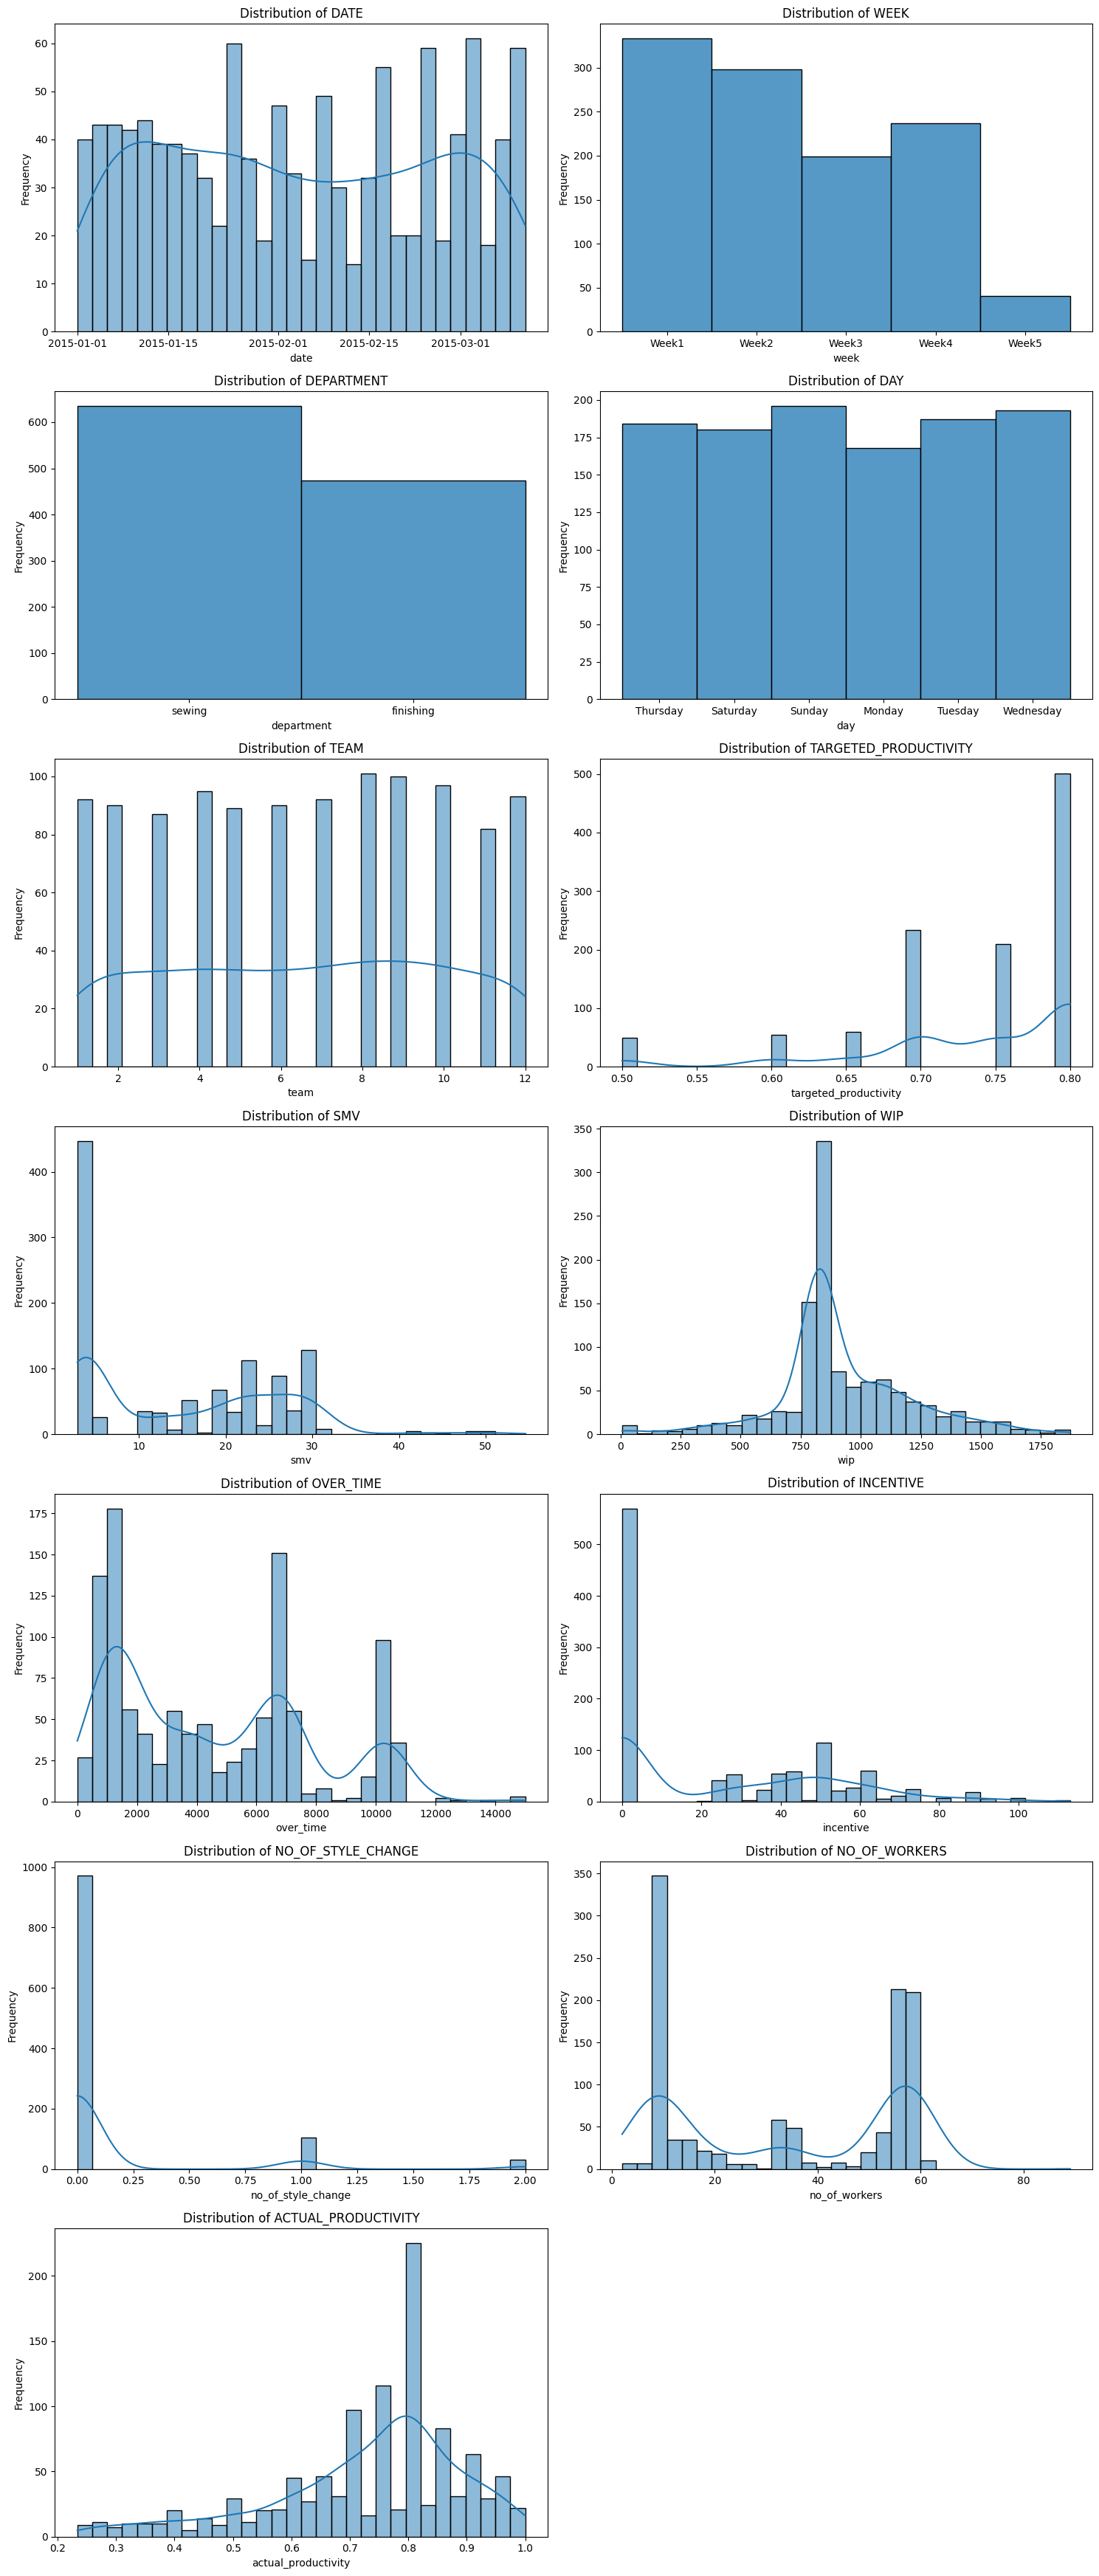

In [76]:
# Identify all columns
columns = df.columns

# Create subplots with 2 columns
num_columns = 2
num_rows = (len(columns) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a histogram for each
for i, col in enumerate(columns):
    ax = axes[i]
    if df[col].dtype == object:
        sns.histplot(df[col], bins=30, kde=False, ax=ax)
    else:
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
    
    ax.set_title(f"Distribution of {str(col).upper()}")
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

### Column Value Trend with Line Plot

#### Over the Historical Time

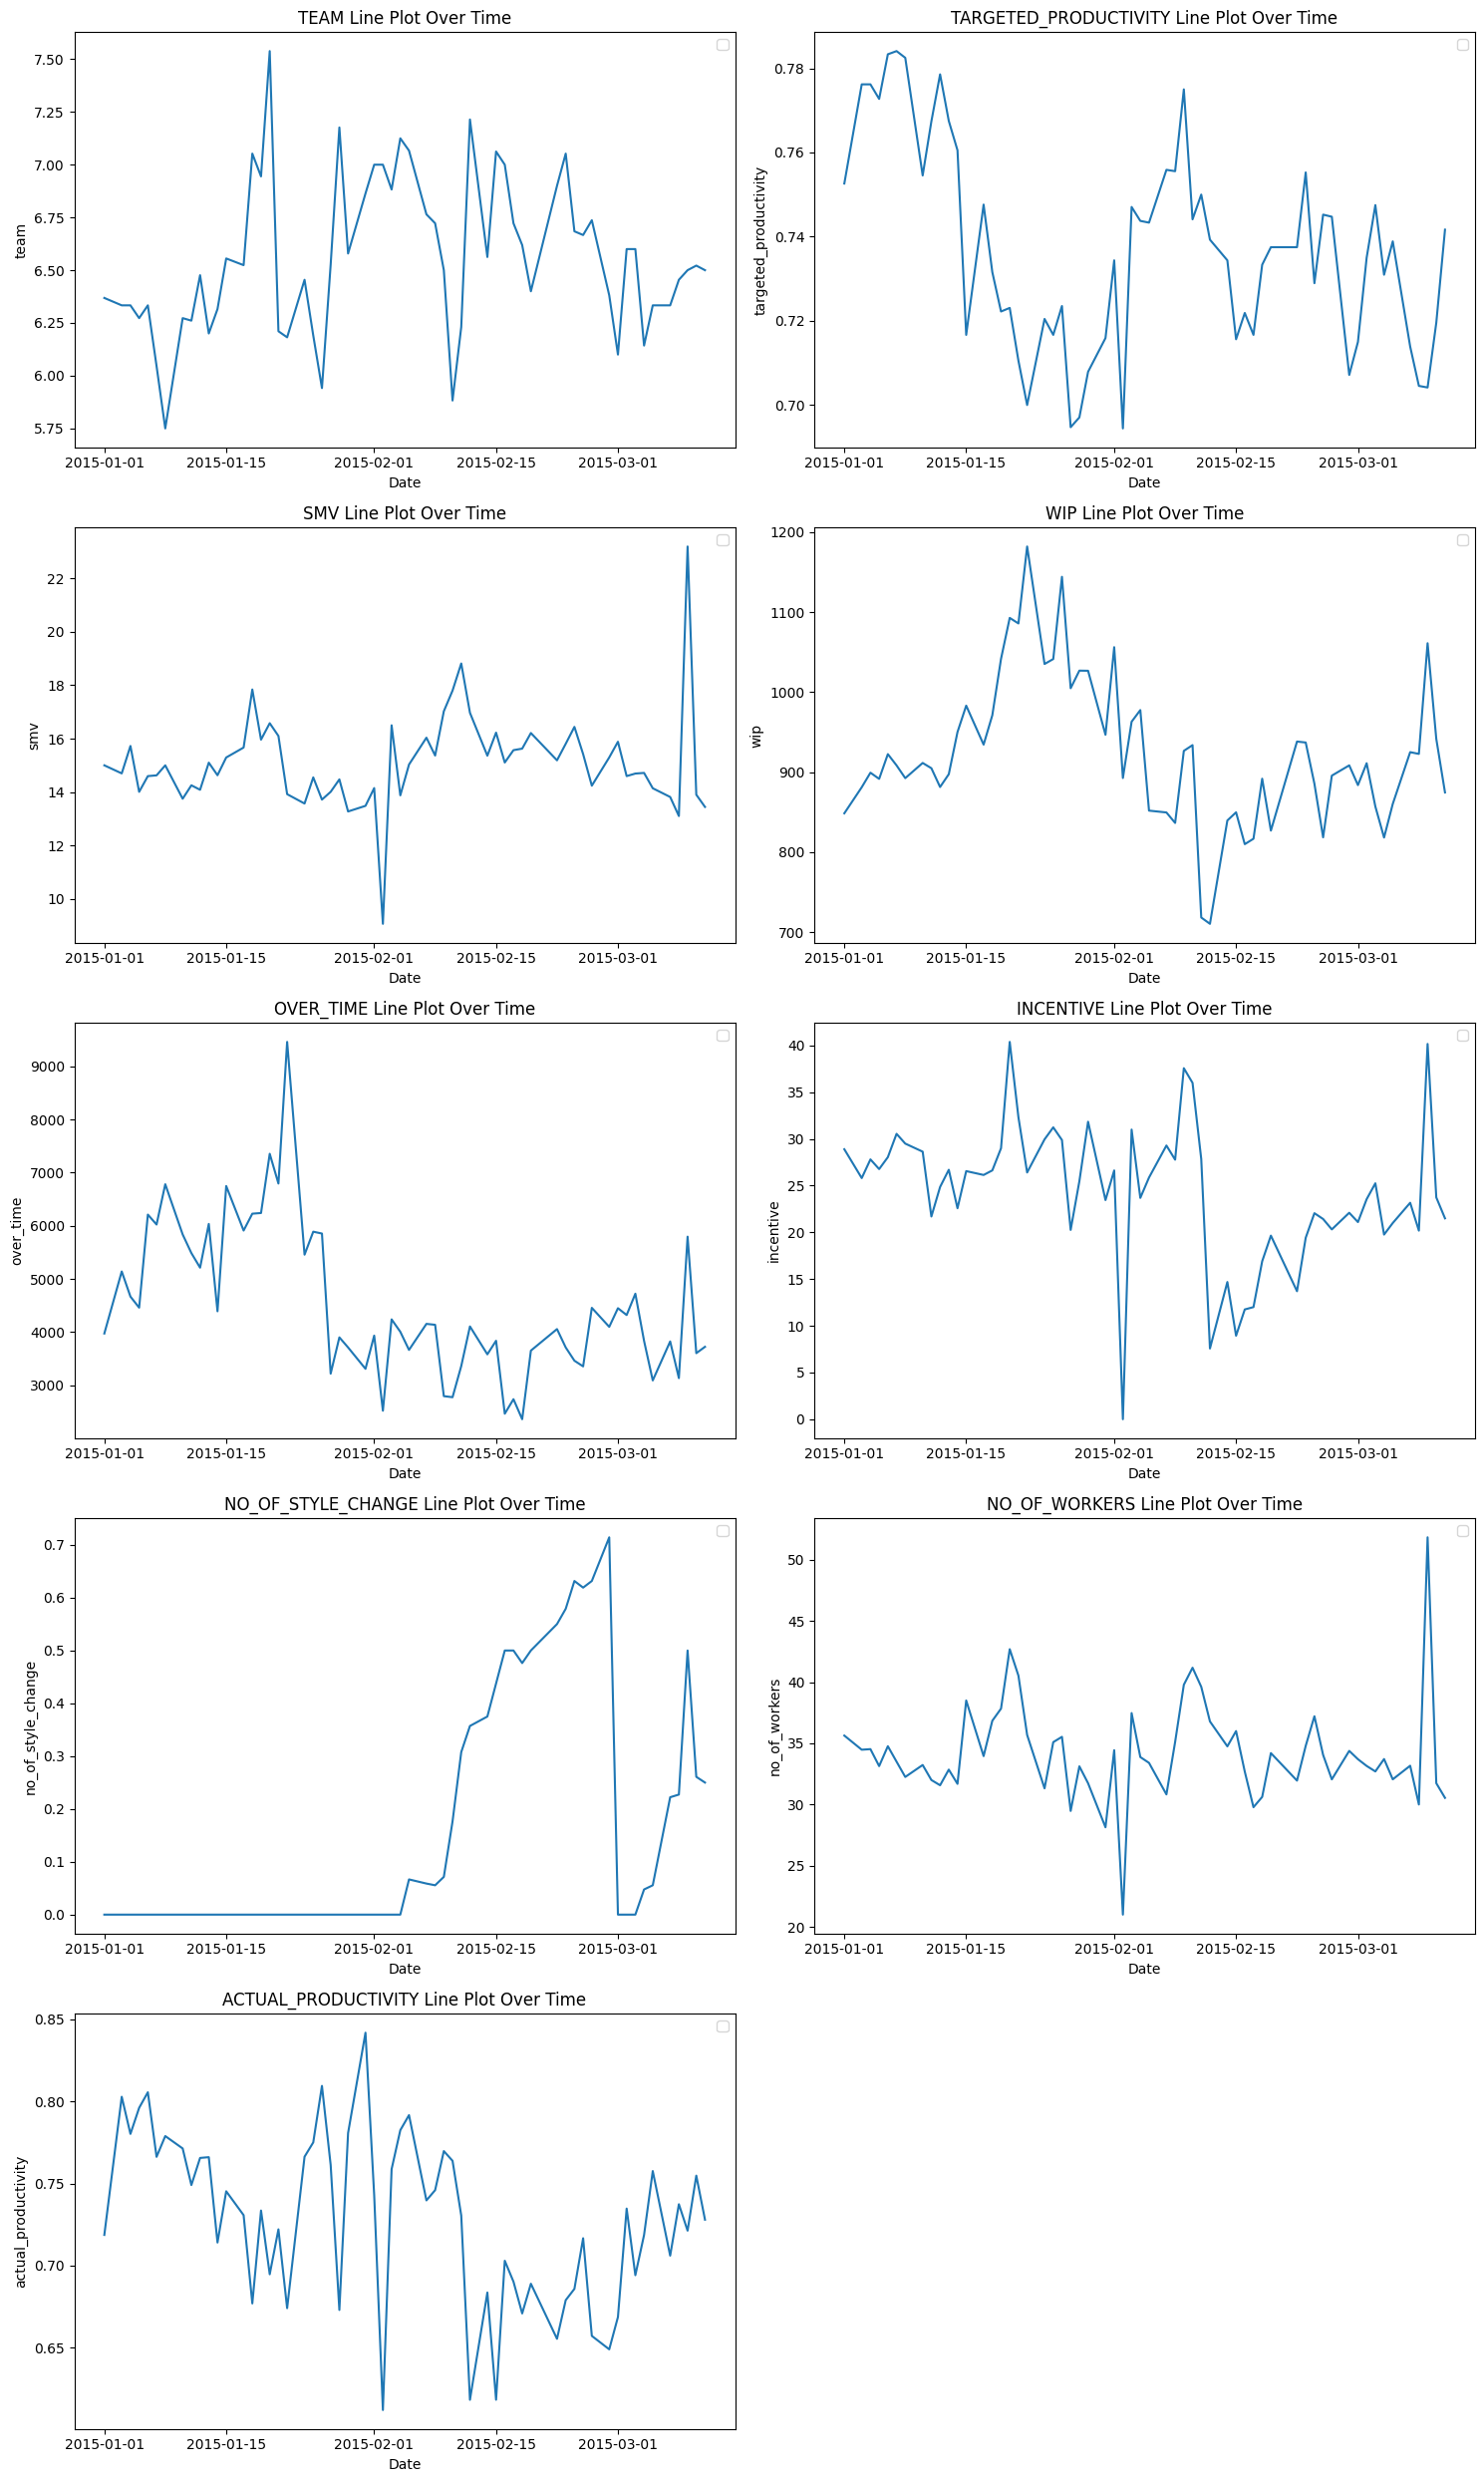

In [77]:
# create instance for numerical columns
num_cols = df._get_numeric_data().columns

# Create subplots with 2 columns
num_columns = 2
num_rows = (len(num_cols) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a line plot for each
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.lineplot(data=df, x='date', y=col, ci=None, ax=ax)
    ax.set_title(f"{str(col).upper()} Line Plot Over Time")
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.legend()

# Hide any unused subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### By Weeks

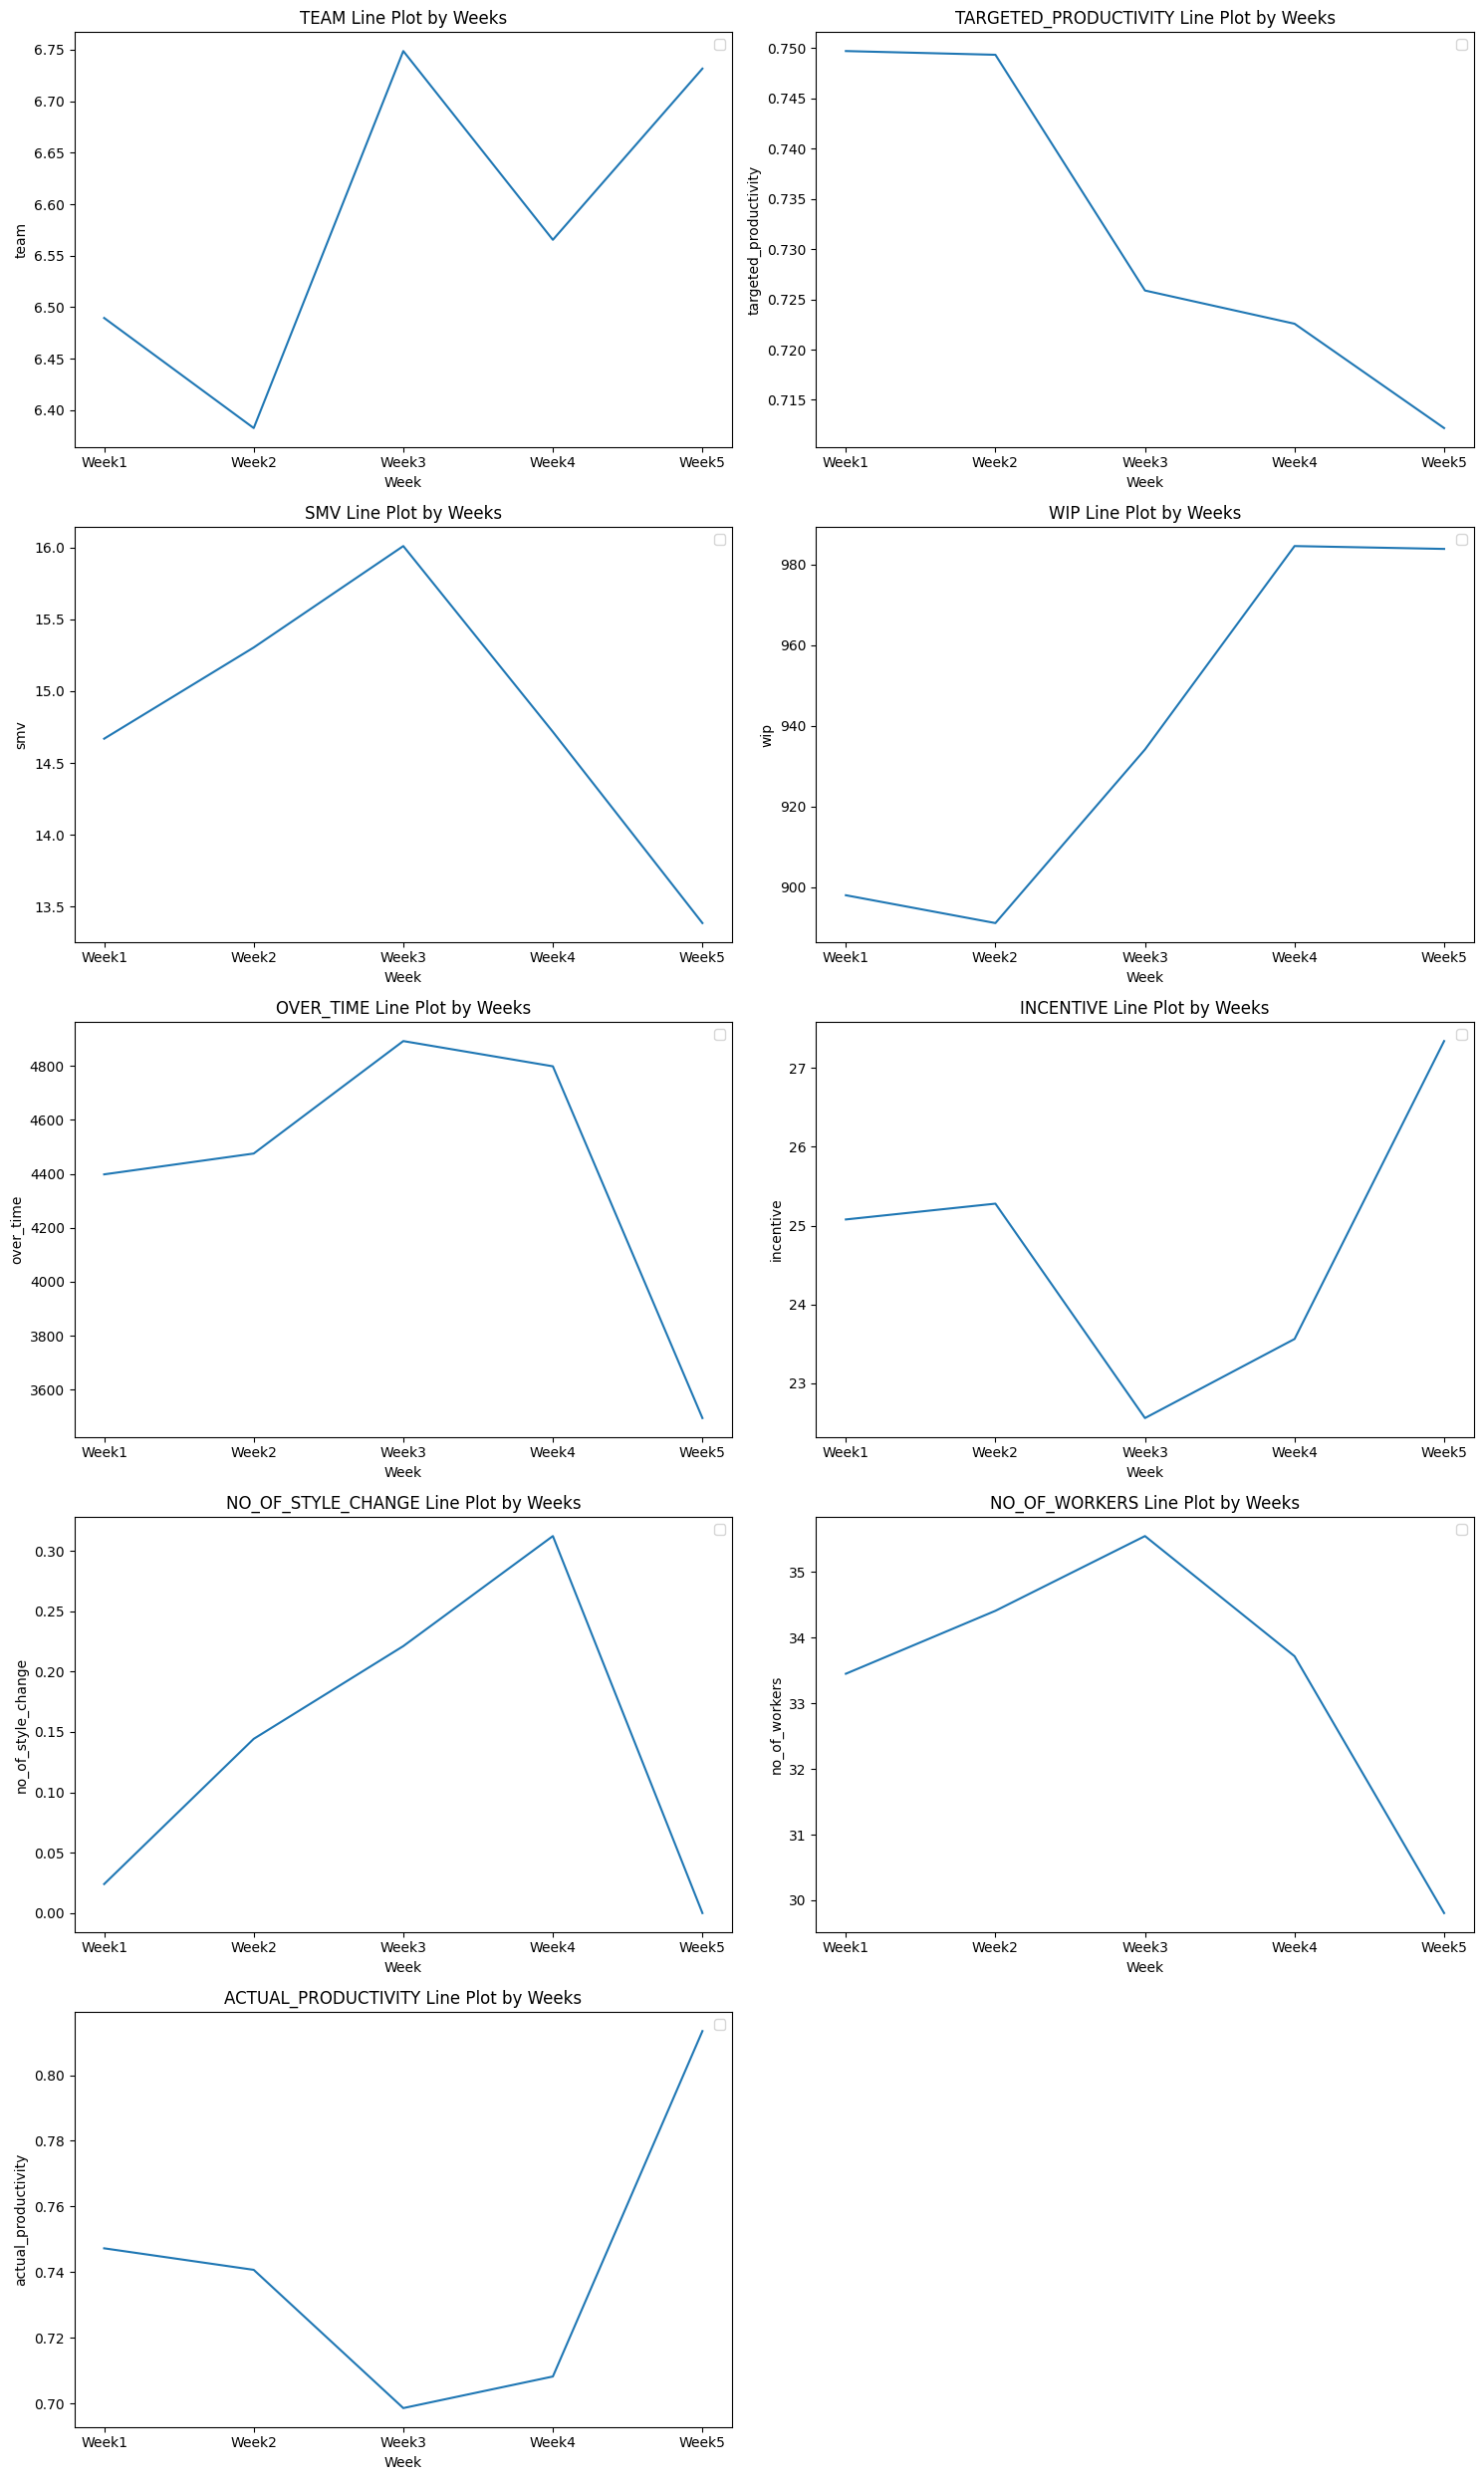

In [78]:
# Create subplots with 2 columns
num_columns = 2
num_rows = (len(num_cols) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a line plot for each
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.lineplot(data=df, x='week', y=col, ci=None, ax=ax)
    ax.set_title(f"{str(col).upper()} Line Plot by Weeks")
    ax.set_xlabel('Week')
    ax.set_ylabel(col)
    ax.legend()

# Hide any unused subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### By Days

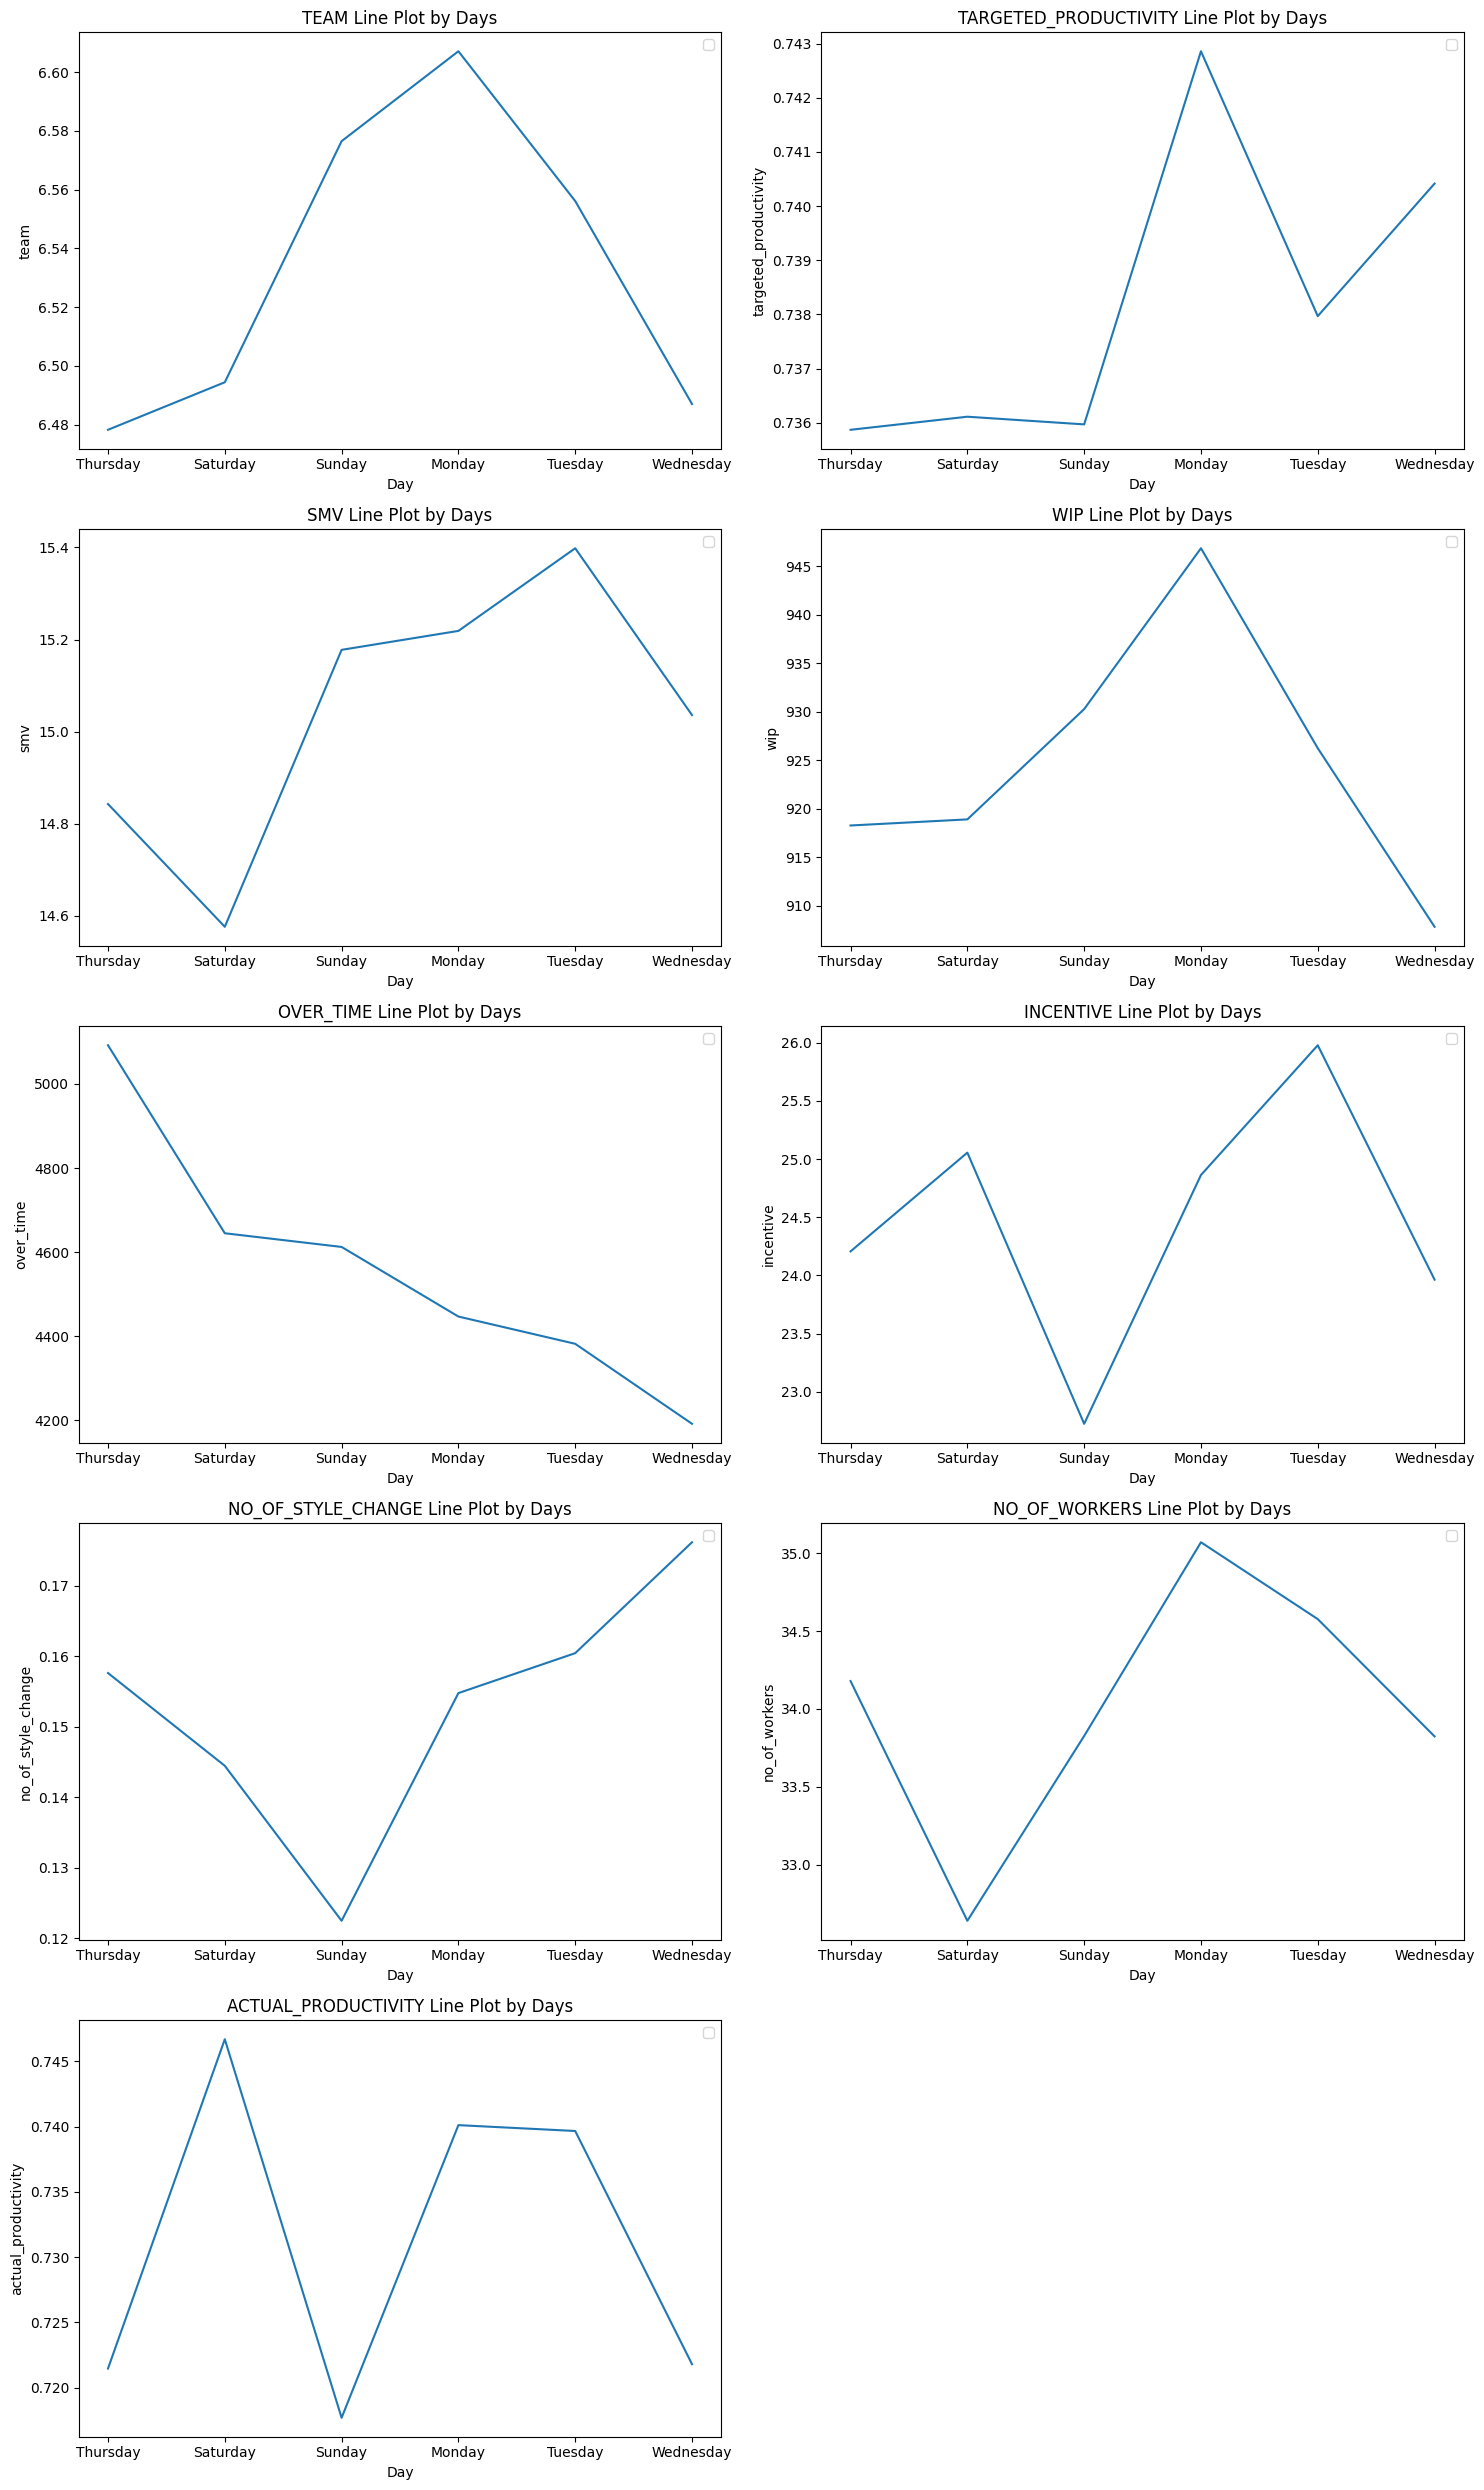

In [79]:
# Create subplots with 2 columns
num_columns = 2
num_rows = (len(num_cols) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a line plot for each
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.lineplot(data=df, x='day', y=col, ci=None, ax=ax)
    ax.set_title(f"{str(col).upper()} Line Plot by Days")
    ax.set_xlabel('Day')
    ax.set_ylabel(col)
    ax.legend()

# Hide any unused subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Targeted Producticity vs Actual Productivity

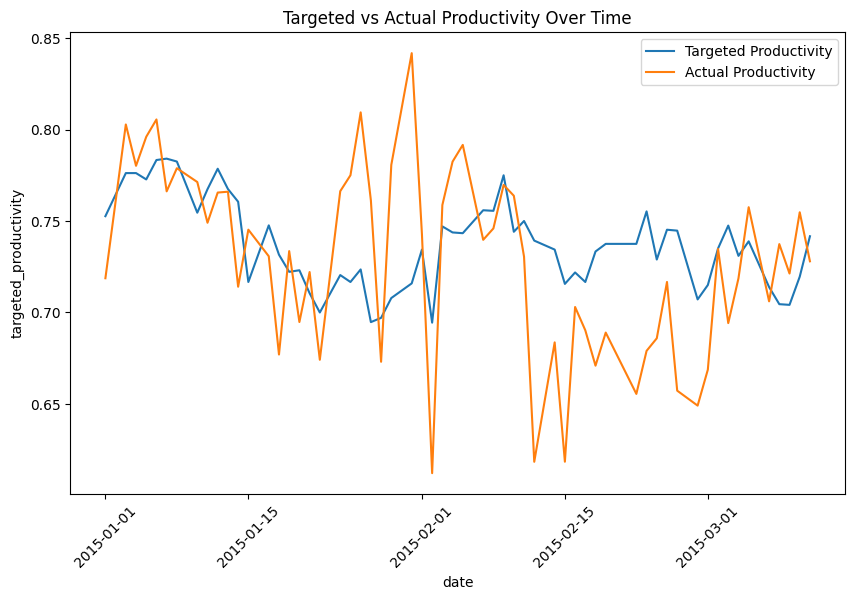

In [80]:
# Plot Targeted vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='targeted_productivity', label='Targeted Productivity',ci=None)
sns.lineplot(data=df, x='date', y='actual_productivity', label='Actual Productivity', ci=None)
plt.xticks(rotation=45)
plt.title('Targeted vs Actual Productivity Over Time')
plt.legend()
plt.show()

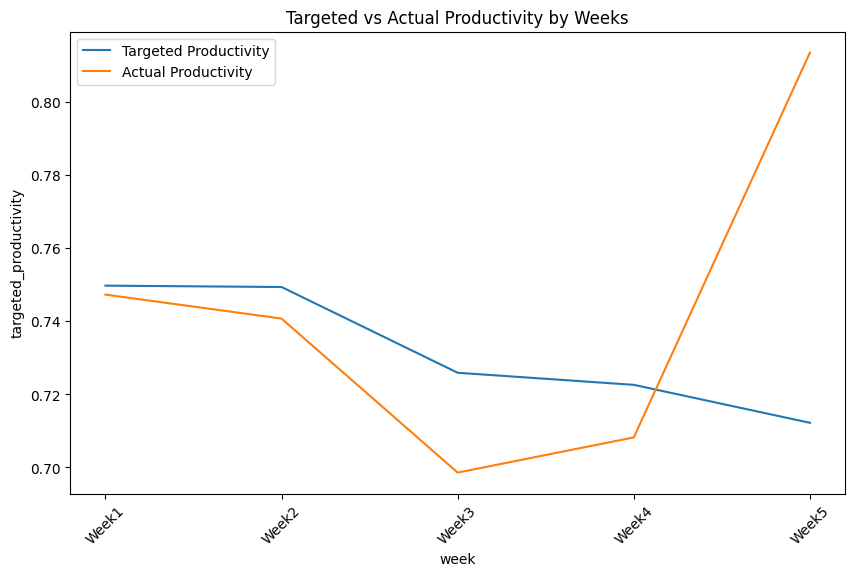

In [81]:
# Plot Targeted vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='targeted_productivity', label='Targeted Productivity',ci=None)
sns.lineplot(data=df, x='week', y='actual_productivity', label='Actual Productivity', ci=None)
plt.xticks(rotation=45)
plt.title('Targeted vs Actual Productivity by Weeks')
plt.legend()
plt.show()

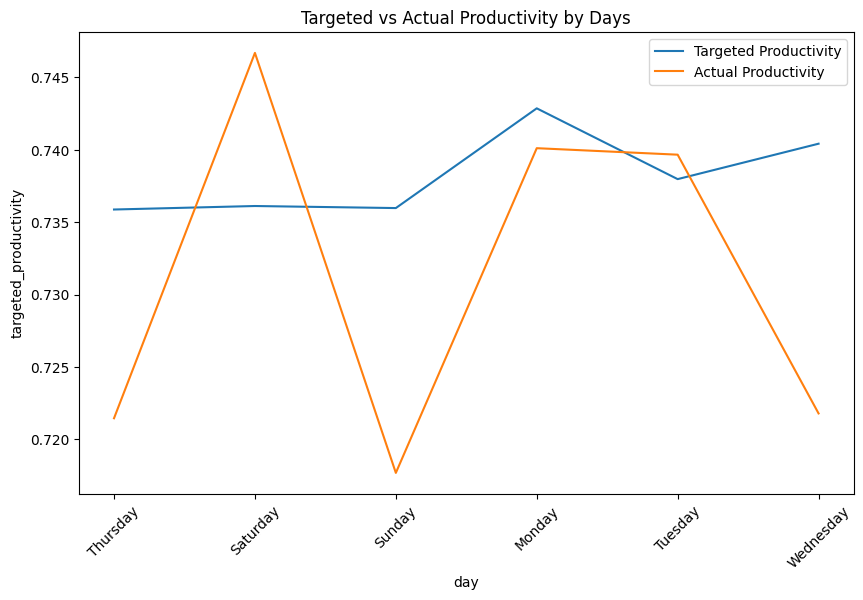

In [82]:
# Plot Targeted vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='day', y='targeted_productivity', label='Targeted Productivity',ci=None)
sns.lineplot(data=df, x='day', y='actual_productivity', label='Actual Productivity', ci=None)
plt.xticks(rotation=45)
plt.title('Targeted vs Actual Productivity by Days')
plt.legend()
plt.show()

### Between Two Highly Correlated Columns

We need to check the correlation matrix first.

In [83]:
corr = df.corr(numeric_only=True).round(3)
corr.style.background_gradient(cmap='coolwarm')

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.073000,-0.103000,0.021000,-0.117000,0.013000,-0.018000,-0.065000,-0.099000
targeted_productivity,0.073000,1.000000,-0.096000,-0.088000,-0.076000,0.183000,-0.226000,-0.104000,0.411000
smv,-0.103000,-0.096000,1.000000,0.177000,0.689000,0.624000,0.317000,0.901000,-0.112000
wip,0.021000,-0.088000,0.177000,1.000000,0.344000,0.365000,-0.020000,0.278000,0.082000
over_time,-0.117000,-0.076000,0.689000,0.344000,1.000000,0.584000,0.057000,0.754000,-0.014000
incentive,0.013000,0.183000,0.624000,0.365000,0.584000,1.000000,0.036000,0.729000,0.271000
no_of_style_change,-0.018000,-0.226000,0.317000,-0.020000,0.057000,0.036000,1.000000,0.317000,-0.179000
no_of_workers,-0.065000,-0.104000,0.901000,0.278000,0.754000,0.729000,0.317000,1.000000,-0.022000
actual_productivity,-0.099000,0.411000,-0.112000,0.082000,-0.014000,0.271000,-0.179000,-0.022000,1.000000


There is no predictors that have a direct high correlation to the target column, actual_productivity. The highest correlation value is 0.41, between targeted_producticity and actual_productivity.

There are some highly correlated between the predictors, I set the minimum threshold to 0.5 correlation value.

In [84]:
def plot_scatter(col1, col2):
    # Scatter plot of incentives vs actual productivity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(f"{str(col1).upper()} vs {str(col2).upper()}")
    plt.show()

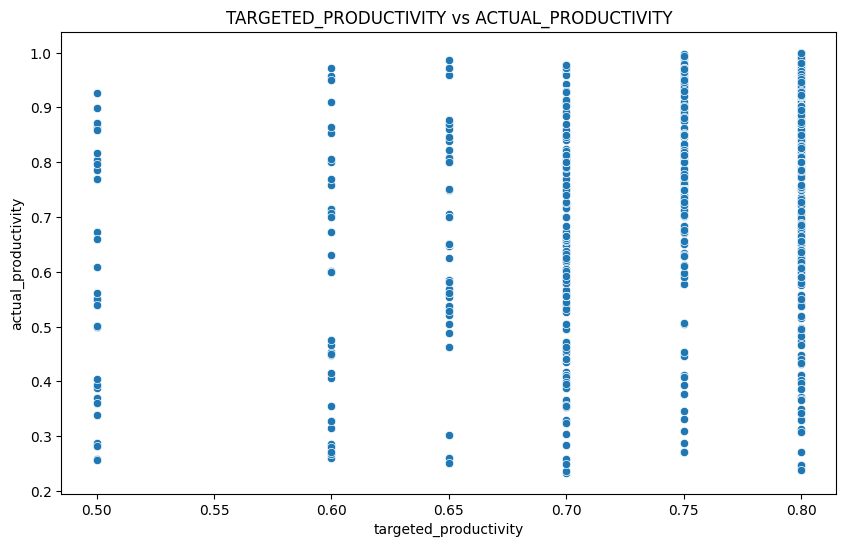

In [91]:
plot_scatter('targeted_productivity', 'actual_productivity')

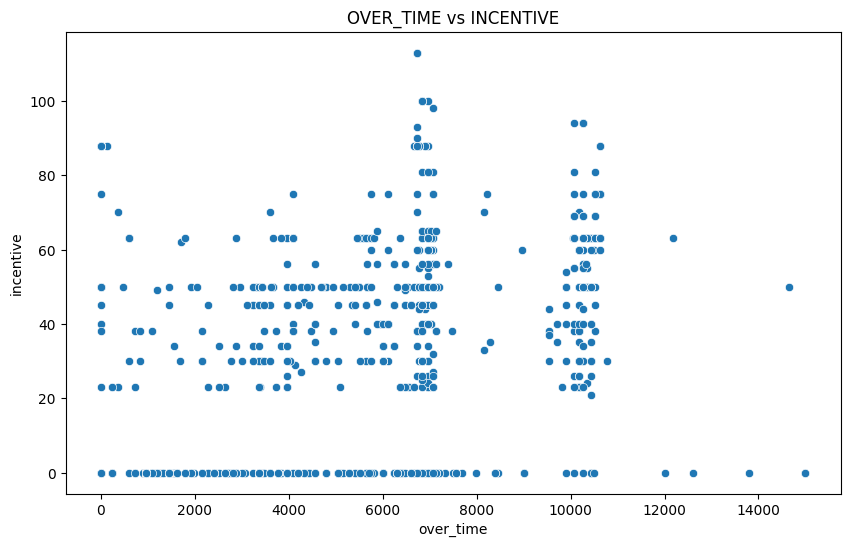

In [85]:
plot_scatter('over_time', 'incentive')

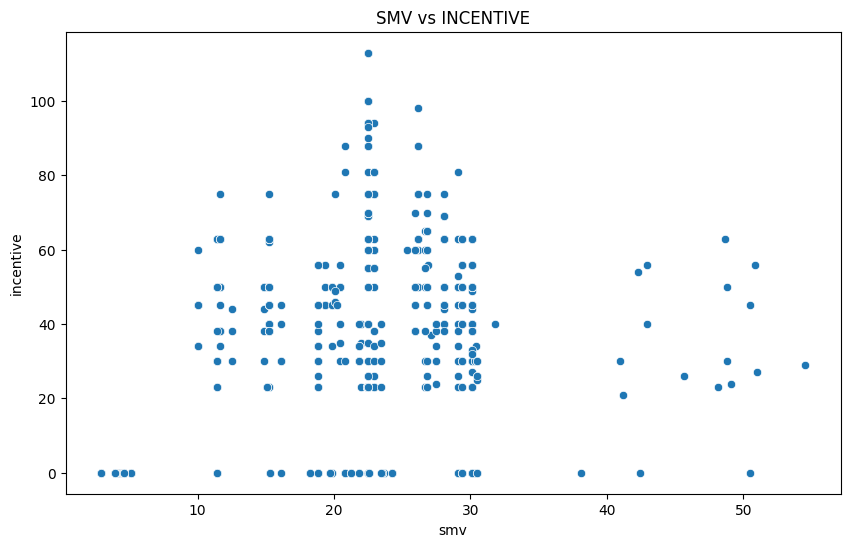

In [86]:
plot_scatter('smv', 'incentive')

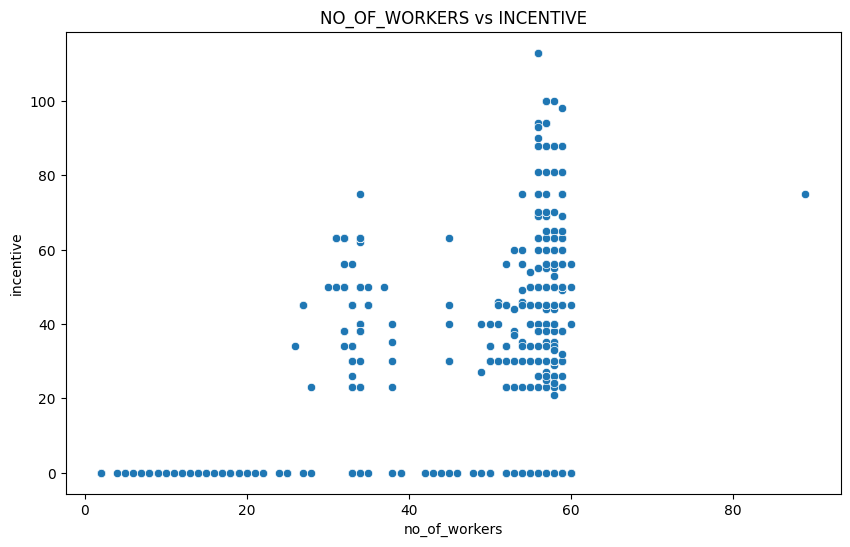

In [87]:
plot_scatter('no_of_workers', 'incentive')

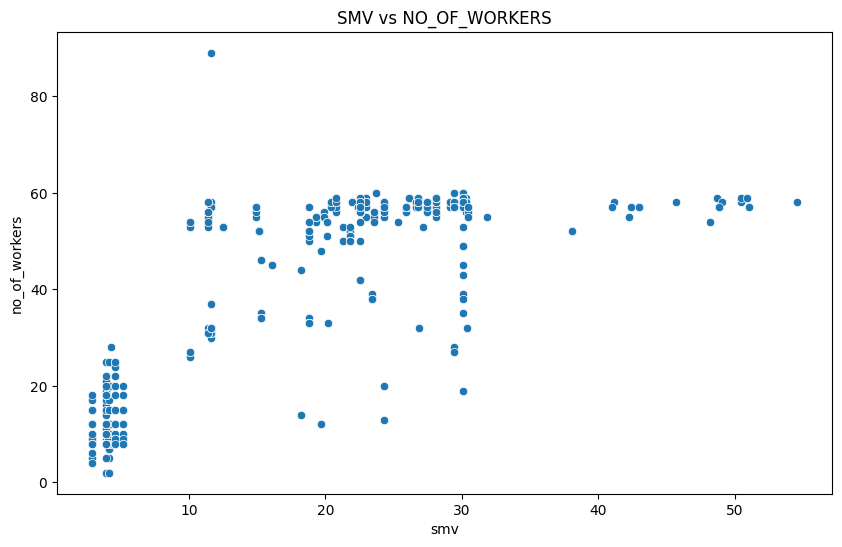

In [88]:
plot_scatter('smv', 'no_of_workers')

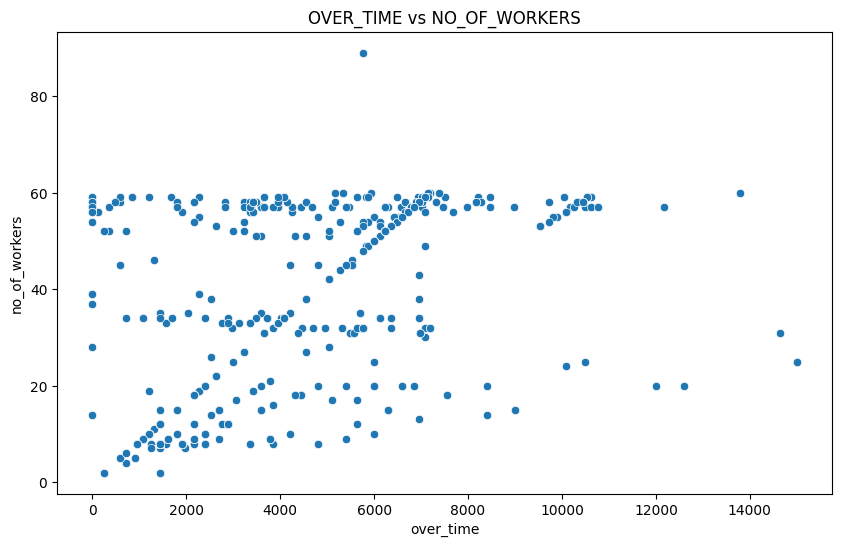

In [89]:
plot_scatter('over_time', 'no_of_workers')

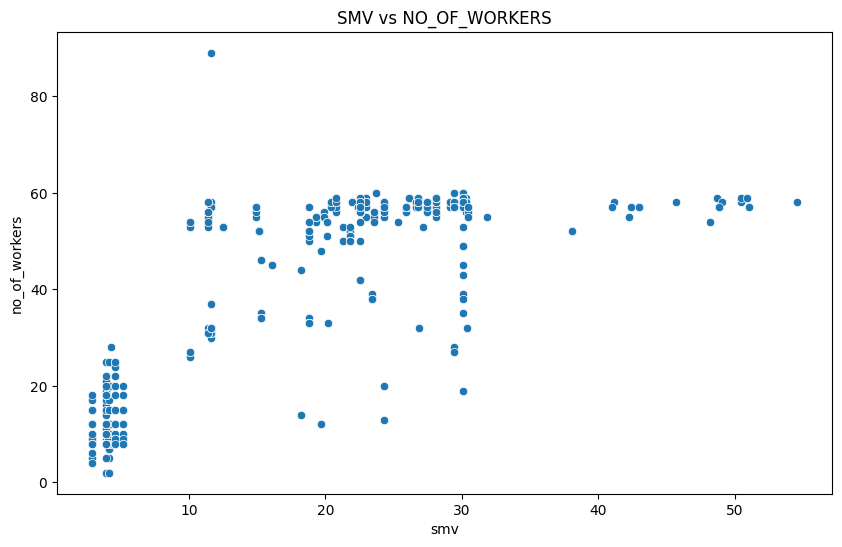

In [90]:
plot_scatter('smv', 'no_of_workers')